In [1]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

import scipy
import numpy as np
from scipy import interpolate
from io import StringIO

from scipy.interpolate import UnivariateSpline

# Reading data

CSV format

In [2]:
#from bigfloat import *

def isNaN(string):
    return string != string
print(isNaN("hello"))
print(isNaN(np.nan))

False
True


Input data type

In [3]:
zeroformat=True

In [94]:
dir = "/home/rita13santos/Desktop/6jun/run3"

Muninn format

In [95]:
res=1
vars=["m", "beta", "xi", "derxi", "derderxi"]
time=[]
grid=[]
"""m=[]
beta=[]
xi=[]
derxi=[]"""
k=1
m_ori=[]
m_scri=[]
beta_ori=[]
beta_scri=[]
xi_ori=[]
xi_scri=[]
derxi_ori=[]
derxi_scri=[]
derderxi_ori=[]

maxmonitorratio=[]

for var in vars:
    
    
    subdir = dir+"/{}.txt".format(var)

    
    print(subdir)
    
    if zeroformat==False: ## reading 2D data
        t=0
        with open(subdir) as f:
            for line in f:

                index = line.find("Time")

                if index==1:
                    t=t+1
                    if k==1:
                        time.append(float(line[index+7:len(line)-1]))
                    auxgrid=[]
                    auxdata=[]


                else:

                    a=line.split()
                    if a!=[]:
                        if k==1:
                            auxgrid.append(float(a[0]))
                        auxdata.append(float(a[1]))

                    elif a==[]:


                        if k==1:
                            if t==1:
                                grid.append(auxgrid)
                            L=len(auxgrid)
                            m_ori.append(auxdata[3])
                            m_scri.append(auxdata[L-4])



                            monitor_ratio=[]
                            i=4
                            for m in auxdata[4:L-4]:
                                monitor_ratio.append(2*m/grid[0][i]*(1-grid[0][i]))
                                i=i+1
                            maxmonitorratio.append(np.max(monitor_ratio))




                        elif k==2:
                            beta_ori.append(auxdata[3])
                            beta_scri.append(auxdata[L-4])
                        elif k==3:
                            xi_ori.append(auxdata[3])
                            xi_scri.append(auxdata[L-4])
                        elif k==4:
                            derxi_ori.append(auxdata[3])
                            derxi_scri.append(auxdata[L-4])
                        elif k==5:
                            derderxi_ori.append(np.max(auxdata[3]))
    else: ## reading 0D data
        with open(subdir) as f:
            i=0
            for line in f:
                i=i+1
                a=line.split()
                #print("i = ", i, " a = ", a)
            
            
            
                #a=line.split()
            
                if k==1:
                    time.append(float(a[0]))
                    m_ori.append(float(a[1]))
                    m_scri.append(float(a[2]))
                elif k==2:
                    beta_ori.append(float(a[1]))
                    beta_scri.append(float(a[2]))
                elif k==3:
                    xi_ori.append(float(a[1]))
                    xi_scri.append(float(a[2]))
                elif k==4:
                    derxi_ori.append(float(a[1]))
                    derxi_scri.append(float(a[2]))
                elif k==5:
                    derderxi_ori.append(float(a[1]))
                
                    
    k=k+1

#count=len(datatime[2])+1
#count

/home/rita13santos/Desktop/6jun/run3/m.txt
/home/rita13santos/Desktop/6jun/run3/beta.txt
/home/rita13santos/Desktop/6jun/run3/xi.txt
/home/rita13santos/Desktop/6jun/run3/derxi.txt
/home/rita13santos/Desktop/6jun/run3/derderxi.txt


In [85]:
maxmonitorratio=[]

time=[]
    
subdir = dir+"/monitorratio.txt".format(var)

    
print(subdir)
## reading 2D data
t=0

with open(subdir) as f:
    for line in f:

        index = line.find("Time")

        if index==1:
            t=t+1
            
            time.append(float(line[index+7:len(line)-1]))
            
            auxgrid=[]
            auxdata=[]


        else:

            a=line.split()
            if a!=[]:
                
                auxgrid.append(float(a[0]))
                auxdata.append(float(a[1]))

            elif a==[]:


                    
                if t==1:
                    grid.append(auxgrid)
                L=len(auxgrid)
                maxmonitorratio.append(np.max(auxdata))
                    
#count=len(datatime[2])+1
#count

/home/rita13santos/Desktop/6jun/run19/monitorratio.txt


KeyboardInterrupt: 

(0.4, 0.72)

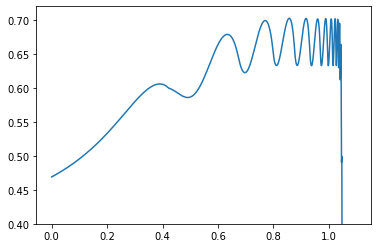

In [7]:
len(maxmonitorratio)
time
plt.plot(time,maxmonitorratio)
plt.ylim(0.4,0.72)

####

In [92]:
maxmonitorratio[0]

IndexError: list index out of range

# Styling plots

In [96]:
plt.rcParams.update({
    'font.size': 12,
    'legend.fontsize':12,
    'xtick.labelsize': 'large',
    'xtick.color': 'black',
    'ytick.labelsize': 'large',
    'ytick.color': 'black'})

# Convert central time to Bondi time

In [97]:
#trapezoidal rule
def trap_integrator(func,f0,x):
    integration=[f0]
    for i in range(0,len(x)-1):
        dx=x[i+1]-x[i]
    
        integral=dx/2*(func(x[i+1])+func(x[i]))
        
        integration.append(integration[i]+integral)
    return integration

#convert central time to bondi time
def converttobondi(time, beta_scri):

    spl = UnivariateSpline(time, np.multiply(np.exp(np.multiply(beta_scri,-2)),time), s=0)

    return trap_integrator(spl,0,time)

bonditime=converttobondi(time,beta_scri)

# Chi at origin

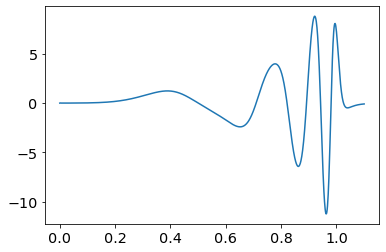

In [98]:
plt.plot(time, derderxi_ori)

Finding zero crossings

In [100]:
from scipy.interpolate import UnivariateSpline

spl = UnivariateSpline(time, derderxi_ori, s=0)

roots=spl.roots()
print("Number of zero crossing is ",len(roots))
#print(roots[k:(k+3)+1])


"""for kkkk in range(0,len(roots)-4):
    tau_star=(roots[0+kkkk]*roots[3+kkkk]-roots[1+kkkk]*roots[2+kkkk])/(roots[0+kkkk]-roots[1+kkkk]-roots[2+kkkk]+roots[3+k])

    print("Delta is ", 2*math.log((tau_star-roots[kkkk])/(tau_star-roots[kkkk+1])), " for k =", kkkk)"""

k=2

tau_star=(roots[0+k]*roots[3+k]-roots[1+k]*roots[2+k])/(roots[0+k]-roots[1+k]-roots[2+k]+roots[3+k])
print("\nTau star is ", tau_star)
print("Tau* is u* in my report")

Delta=2*math.log((tau_star-roots[k])/(tau_star-roots[k+1]))
print("\nDelta is ", Delta)

Number of zero crossing is  7

Tau star is  1.0839444422161653
Tau* is u* in my report

Delta is  0.6246804482998936


In [91]:
#Delta=0.6
#tau_star=1.05547230575711574

In [101]:
#adapt_time = [-math.log(abs((tau_star-x))) for x in time[0:len(time)-1]]#0:len(time)-step:step]] #ignoring last timestep, where log(0)

adapt_time=[]

for x in time:
    if x<=tau_star:
        adapt_time.append(-math.log(abs((tau_star-x))))

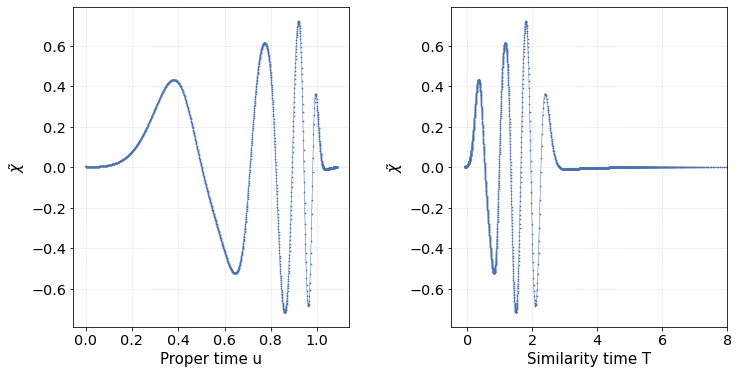

In [102]:
chitilde=[]
i=0
for tt in adapt_time:
    
    aux=np.exp(-tt)*1/2*derderxi_ori[i] #chi tilde = e^-T chi = e^-T (1/2 xi,rr)
    chitilde.append(aux)
    i=i+1

with plt.style.context('seaborn-v0_8-deep'):
    plt.rcParams["font.family"] = 'sans-serif'


    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))


    ax1.plot(time[0:len(chitilde)],chitilde,linewidth=0.5)
    ax1.scatter(time[0:len(chitilde)],chitilde,s=0.5)
    ax1.set_xlabel("Proper time u",fontsize=15)
    ax1.set_ylabel(r"$\tilde{\chi}$",fontsize=15)
    ax1.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    #ax1.set_xlim([1,1.1])
    
    ax2.plot(adapt_time,chitilde,linewidth=0.5)
    ax2.scatter(adapt_time,chitilde,s=0.5)
    ax2.set_xlabel("Similarity time T",fontsize=15)
    ax2.set_ylabel(r"$\tilde{\chi}$",fontsize=15)
    ax2.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    fig.tight_layout(pad=3.0)
    ax2.set_xlim([-0.5, 8])
    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
    
    plt.show()

Compactness

ValueError: x and y must have same first dimension, but have shapes (1773,) and (0,)

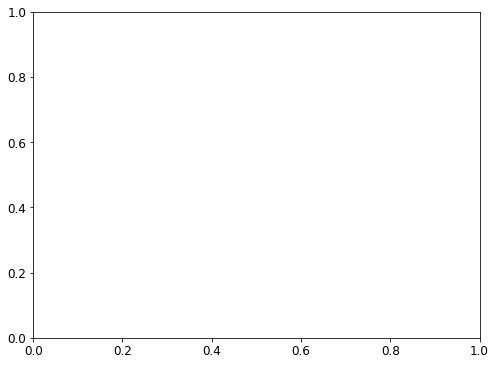

In [22]:


with plt.style.context('seaborn-v0_8-deep'):
    plt.rcParams["font.family"] = 'sans-serif'
    plt.rcParams["figure.figsize"] = (8,6)
    plt.rcParams["xtick.labelsize"]= "large"
    plt.rcParams["xtick.color"]= "black"
    plt.rcParams["ytick.labelsize"]= "large"
    plt.rcParams["ytick.color"]= "black"

    len(maxmonitorratio)

    plt.plot(converttobondi(time,beta_scri),maxmonitorratio,linewidth=0.5)
    plt.scatter(converttobondi(time,beta_scri),maxmonitorratio,s=0.2,alpha=0.8)
    
    plt.xlim(-0.01, 0.165)
    #plt.ylim(0.7, 0.72)
    plt.xlabel("Bondi time $u_B$",fontsize=15)#$\u03C4$")
    plt.ylabel("Compactness (2m/r)",fontsize=15)#$\u03C4$")
    plt.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    
    
    plt.tight_layout(pad=3.0)
    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
    
    plt.show()

News function

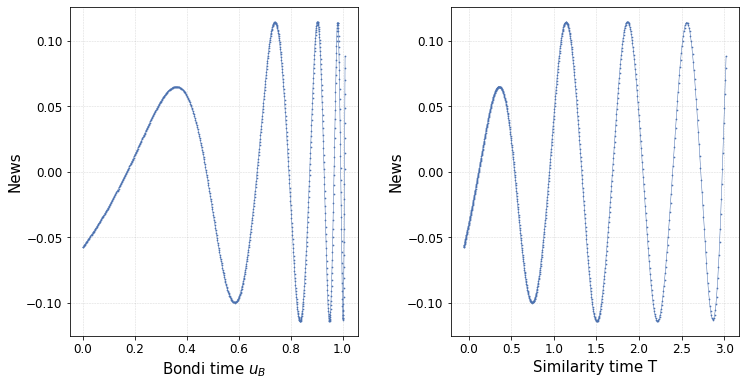

In [32]:
news=[]
for i in range(0, len(xi_scri)-1):
    new=np.exp(-beta_scri[i])*(xi_scri[i+1]-xi_scri[i])/(time[i+1]-time[i])
    news.append(new)
    
with plt.style.context('seaborn-v0_8-deep'):
    plt.rcParams["font.family"] = 'sans-serif'


    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))


    ax1.plot(time[0:len(news)],news,linewidth=0.5)
    ax1.scatter(time[0:len(news)],news,s=0.5)
    ax1.set_xlabel("Bondi time $u_B$",fontsize=15)
    ax1.set_ylabel("News",fontsize=15)
    ax1.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    
    ax2.plot(adapt_time[0:len(news)],news[0:len(news)],linewidth=0.5)
    ax2.scatter(adapt_time[0:len(news)],news[0:len(news)],s=0.5)
    ax2.set_xlabel("Similarity time T",fontsize=15)
    ax2.set_ylabel("News",fontsize=15)
    ax2.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    fig.tight_layout(pad=3.0)
    
    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
    
    plt.show()

m at scri+

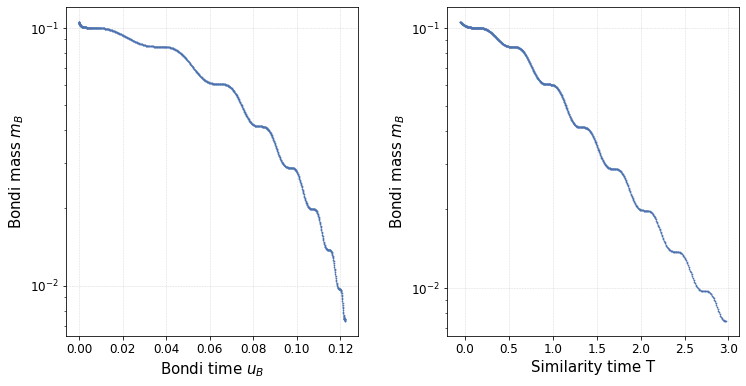

In [33]:
mplt=[]

i=0
for tt in adapt_time:
    
    aux=m_scri[i]#np.exp(-tt)*1/2*m_scri[i]
    mplt.append(aux)
    i=i+1
    
with plt.style.context('seaborn-v0_8-deep'):
    plt.rcParams["font.family"] = 'sans-serif'
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))

    
    # time
    ax1.scatter(bonditime[0:len(mplt)],mplt[0:len(mplt)],s=0.5)
    ax1.plot(bonditime[0:len(mplt)],mplt,linewidth=0.5)
    ax1.set_ylabel("Bondi mass $m_B$", fontsize=15)
    ax1.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    #ax1.set_xlim([.8,1.04])
    
    ax1.set_yscale('log')
    #ax1.set_xlabel("$\u03C4$")#T
    ax1.set_xlabel("Bondi time $u_B$", fontsize=15)#$\u03C4$")
    
    # adapt time
    
    ax2.plot(adapt_time[0:len(adapt_time)-10],np.array(mplt[0:len(adapt_time)-10]),linewidth=0.5)
    ax2.scatter(adapt_time[0:len(adapt_time)-10],np.array(mplt[0:len(adapt_time)-10]),s=0.5)
    ax2.set_yscale('log')
    #ax2.set_xlim([0,2])
    #ax2.set_ylim([0.01,0])
    ax2.set_ylabel("Bondi mass $m_B$", fontsize=15)
    ax2.set_xlabel("Similarity time T", fontsize=15)
    ax2.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)

    fig.tight_layout(pad=3.0)
    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
    
    plt.show()

numerical vs analytical mass loss

In [34]:
#chi,u
deruxi = []

for i in range(0, len(xi_scri)-1):
    aux=(xi_scri[i+1]-xi_scri[i])/(time[i+1]-time[i])##eq.59 from my report ref eq:news
    deruxi.append(aux)

#theoretical mass loss

massloss=[]

for i in range(0, len(xi_scri)-1):
    aux=-2*math.exp(-2*beta_scri[i])*math.pi*4*deruxi[i]**2
    massloss.append(aux)



In [35]:
#experimental mass loss
masslossexp=[]
for i in range(0, len(m_scri)-1):
    aux=(m_scri[i+1]-m_scri[i])/(time[i+1]-time[i])##eq.59 from my report ref eq:news
    masslossexp.append(aux)

In [61]:
colors= plt.rcParams['axes.prop_cycle'].by_key()['color']                       
print('\n'.join(color for color in colors))                                      
#E24A33

#1f77b4
#ff7f0e
#2ca02c
#d62728
#9467bd
#8c564b
#e377c2
#7f7f7f
#bcbd22
#17becf


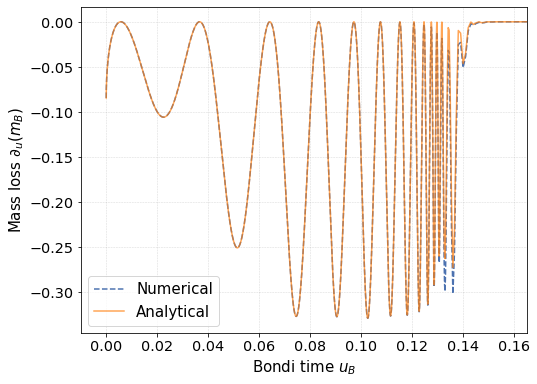

In [81]:

with plt.style.context('seaborn-v0_8-deep'):
    
    plt.rcParams["figure.figsize"] = (8,6)
    plt.rcParams["font.size"]= 12
    plt.rcParams["legend.fontsize"]= 12
    plt.rcParams["xtick.labelsize"]= "large"
    plt.rcParams["xtick.color"]= "black"
    plt.rcParams["ytick.labelsize"]= "large"
    plt.rcParams["ytick.color"]= "black"

    
    #plt.scatter(converttobondi(time,beta_scri)[0:len(time)-1],masslossexp,s=35)
    #plt.scatter(converttobondi(time,beta_scri)[0:len(time)-1],massloss, alpha=0.5,s=20)
    plt.plot(converttobondi(time,beta_scri)[0:len(time)-1],masslossexp,label='Numerical',linewidth=1.5,linestyle="dashed")
    plt.plot(converttobondi(time,beta_scri)[0:len(time)-1],massloss,label='Analytical',linewidth=1.5,alpha=0.7,color='#ff7f0e')
    #plt.plot(adapt_time[0:len(adapt_time)],masslossexp[0:len(adapt_time)],label='Numerical',linewidth=1)
    #plt.plot(adapt_time,massloss[0:len(adapt_time)],label='Analytical',linewidth=1,alpha=0.5)
    
    plt.xlim(-0.01, 0.165)
    plt.xlabel("Bondi time $u_B$", fontsize=15)#$\u03C4$")
    plt.ylabel("Mass loss $\partial_u(m_B)$", fontsize=15)#$\u03C4$")
    plt.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    
    plt.legend(fontsize=15);

    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")

    plt.show()
#plt.xlim([0,3])

Redshift factor

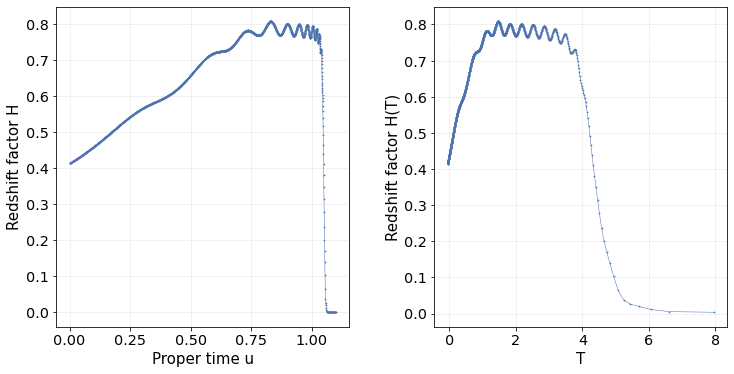

In [99]:
redshift=[]
for i in range(0, len(beta_scri)):
    #redshift.append(math.exp(2*beta[i][len(beta[0])-4])-1)
    #redshift.append(math.exp(2*beta_scri[i])-1)
    redshift.append(beta_scri[i])
    
with plt.style.context('seaborn-v0_8-deep'):
    #plt.rcParams.update({'font.size': 12})    
    #plt.rcParams["figure.figsize"] = (7,5)
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))

    ax1.plot(time,redshift,linewidth=0.5)
    ax1.scatter(time,redshift,s=0.5)
    ax1.set_xlabel("Proper time u",fontsize=15)#"$\u03C4$")
    ax1.set_ylabel("Redshift factor H",fontsize=15)
    ax1.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    
    ax2.plot(adapt_time[0:len(adapt_time)],redshift[0:len(adapt_time)],linewidth=0.5)
    ax2.scatter(adapt_time[0:len(adapt_time)],redshift[0:len(adapt_time)],s=0.5)
    
    ax2.set_xlabel("T",fontsize=15)
    ax2.set_ylabel("Redshift factor H(T)",fontsize=15)
    ax2.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    
    fig.tight_layout(pad=3.0)
    
    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
    plt.show()

In [ ]:
ax2.plot(adapt_time[0:len(adapt_time)-10],np.array(mplt[0:len(adapt_time)-10]),linewidth=0.5)
    ax2.scatter(adapt_time[0:len(adapt_time)-10],np.array(mplt[0:len(adapt_time)-10]),s=0.5)
    ax2.set_yscale('log')
    #ax2.set_xlim([0,2])
    #ax2.set_ylim([0.01,0])
    ax2.set_ylabel("Bondi mass $m_B$", fontsize=15)
    ax2.set_xlabel("Similarity time T", fontsize=15)
    ax2.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)

    fig.tight_layout(pad=3.0)

Bondi mass at scri+

In [228]:
mplt=[]
for i in range(0, len(derpsi)):
    mplt.append(m[i][len(m[0])-4]) #saving derpsi at the origin for each timestep

with plt.style.context('seaborn-v0_8-deep'):
    
    #plt.rcParams.update({'font.size': 12})    
    #plt.rcParams["figure.figsize"] = (7,5)
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))
    
    
    
    
    # time
    ax1.scatter(time,mplt,s=0.5)
    ax1.plot(time,mplt,linewidth=0.5)
    ax1.set_ylabel("Bondi mass")
    #ax1.set_xlim([.8,1.04])
    #ax1.set_ylim([-0.001,0.002])
    ax1.set_yscale('log')
    ax1.set_xlabel("$\u03C4$")#T
    ax1.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    
    # adapt time
    
    ax2.plot(adapt_time,np.array(mplt[0:len(adapt_time)]),linewidth=0.5)
    ax2.set_yscale('log')
    #ax2.set_xlim([2.55,2.6])
    #ax2.set_ylim([-0.001,0.001])
    ax2.set_ylabel("Bondi mass")
    ax2.set_xlabel("T")
    ax2.grid(color='gray', linestyle='--', linewidth=0.5,alpha=0.3)
    
    plt.show()

NameError: name 'derpsi' is not defined

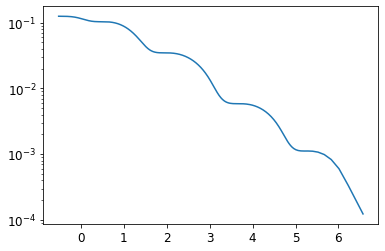

In [84]:
plt.plot(adapt_time[10:len(adapt_time)-3],np.array(mplt[10:len(adapt_time)-3]))
plt.yscale('log')